In [ ]:
#from __future__ import absolute_import, division, print_function, unicode_literals
# !pip uninstall tensorflow-gpu -y
# !pip install tensorflow-gpu==2.0


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [ ]:
import tensorflow as tf
print(tf.__version__)

import numpy as np

# from tensorflow.keras.layers import Dense, Flatten, Conv2D
# from tensorflow.keras import Model

import matplotlib.pyplot as plt


2.3.0


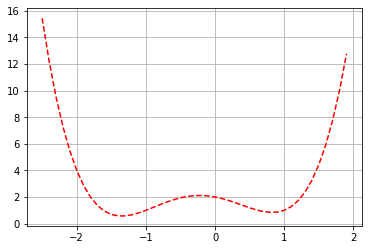

In [ ]:

t = np.arange(-2.5, 2, 0.1)

# red dashes, blue squares and green triangles
plt.grid(b=True)
plt.plot(t, t**4+t**3-2*t**2-t+2, 'r--')
plt.show()


In [ ]:
# x_in = tf.Variable(3,name='x_in')
x_in = tf.Variable(2, name='x_in', trainable=True, dtype=tf.float32)
# x_in = tf.Variable(-1, name='x_in', trainable=True, dtype=tf.float32)



In [ ]:
optimizer = tf.keras.optimizers.Adam(.1)


In [ ]:

def train_step_f():
  with tf.GradientTape(persistent=True) as tape: #Automatic differentiation and gradient tape
    y_o=x_in**4+x_in**3-2*x_in**2-x_in+2

  trainable_variables=[x_in]
  gradients = tape.gradient(y_o, trainable_variables)
#   print("------------")
#   print(gradients)
#   print("------------")
  optimizer.apply_gradients(zip(gradients, trainable_variables))




In [ ]:
print("before")
print(x_in)
print("----------------")
train_step_f()
print("after")
print(x_in)
print("----------------")


before
<tf.Variable 'x_in:0' shape=() dtype=float32, numpy=2.0>
----------------
after
<tf.Variable 'x_in:0' shape=() dtype=float32, numpy=0.9999703>
----------------


In [ ]:
x_vals=[]
y_vals=[]
for i in range(50):
  train_step_f()
  y_test=x_in**4+x_in**3-2*x_in**2-x_in+2
  x_vals.append(x_in.numpy())
  y_vals.append(y_test.numpy())
  if i%5==0:
    print(x_in.numpy(),end=",")
    print(y_test.numpy())
    print("--------------")


0.2885306,1.5759203
--------------
-1.7030677,1.3750929
--------------
-1.4104367,0.58338773
--------------
-0.7513633,1.5168031
--------------
-0.86899656,1.2727187
--------------
-1.4534701,0.62072885
--------------
-1.4729228,0.6451483
--------------
-1.1441679,0.7418699
--------------
-1.339583,0.5669273
--------------
-1.4480158,0.6147498
--------------


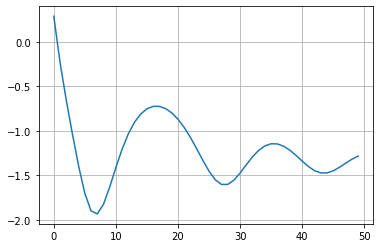

In [ ]:
plt.grid(b=True)
plt.plot(x_vals)
plt.show()


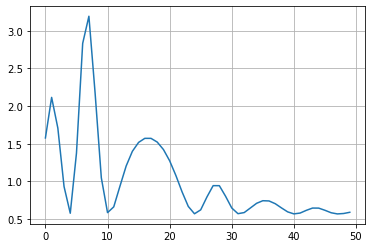

In [ ]:
plt.grid(b=True)
plt.plot(y_vals)
plt.show()


In [ ]:
#print(x_vals)

In [ ]:
x_in = tf.Variable(2, name='x_in', trainable=True, dtype=tf.float32)


In [ ]:
def my_func():
    y_tmp = x_in**4+x_in**3-2*x_in**2-x_in+2
    return y_tmp

trainable_variables=[x_in]



In [ ]:
x_in

<tf.Variable 'x_in:0' shape=() dtype=float32, numpy=2.0>

In [ ]:
my_func()

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>

In [ ]:
# train = optimizer.minimize(my_func, var_list=trainable_variables)


In [ ]:
for i in range(50):
  y_test=x_in**4+x_in**3-2*x_in**2-x_in+2
  # if i%50==49:
  print(x_in.numpy(),end=",")
  print(y_test.numpy())
  print("--------------")
  train = optimizer.minimize(my_func, var_list=trainable_variables)
